In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

np.random.seed(666)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,7)

### The Neural Network Layer

A standard feed forward neural network layer is given by

$$
a = \gamma(h) = \gamma(x W^T + b)
$$

Where
* $x$ is the input,
* $W$ is the weight matrix,
* $b$ is the bias term,
* $h$ is the linear predictor,
* $\gamma$ is the activation function,
* $a$ is the output.


To be sure that we fully understand these terms, we should consider the spaces they occupy - i.e. their dimensionality:

* $x \in \mathbb R^{n \times p}$ where $n$ is batch size and $p$ is the input dimension,
* $W \in \mathbb R^{q \times p}$ where $q$ is output dimension and $p$ is the input dimension,
* $b \in \mathbb R^{p}$ where $p$ is output dimension,
* $a, h \in \mathbb R^{n \times q}$ where $n$ is batch size and $q$ is the output dimension.

The tricky thing with neural networks is the backpropigation. Let $L$ be the loss from the subsequent layer.  For each layer we have a general derivative.

$$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial h}.
$$

This derivative is always in the space $\mathbb R^{n \times q}$. Furthermore, we have

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial h}\frac{\partial h}{\partial w}.
$$

This is always in the space $\mathbb R^{n \times q \times p}$. Then we have

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial h}\frac{\partial h}{\partial b}.
$$

Since $\frac{\partial h}{\partial b}$ is always 1, this simplifies to the general derivative. Lastly, we want the derivative we send backwards to the previous layer, given by

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial h}\frac{\partial h}{\partial x}.
$$

Let's break these suckers down. The first term is actually provided from the subsequent layer - either the loss function or the residual gradient from the previous layer. This simply means we don't have to worry about that too much. We can think of this as an input to the layers backpropigation. Let's simplify our notation and simply call this

$$
\frac{\partial L}{\partial a} = L'.
$$

This is the loss contribution and is computed first and foremost via an objective function, or loss/cost function.

### Loss Functions

There are a multitude of applicable objective / loss functions to use. Two in particular are very common. 

Firstly, the squared loss, sometimes called SSE, MSE or $L^2$ error.

$$
SSE(t, \hat t) = \sum_i (t_i - \hat t_i)^2
$$

When dividing by the number of batches, this is called the mean squared error (MSE). This is a natural error term, as it corresponds closely to the euclidean norm.

The derivative is given by

$$
SSE'(t, \hat t) = - 2 \sum_i (t_i - \hat t_i).
$$


In [3]:
class SSE:
    
    def __call__(self, t, th):
        # Make your implementation here
        pass
    
    def grad(self, t, th):
        # Make your implementation here
        pass

Next we have Binary Cross Entropy. 

$$
BCE(t, \hat t) = - (t\ln(\hat t) + (1 - t)\ln(1 - \hat t)).
$$

This has nice properties when used with the logistic sigmoid function, and is used together in logistic regression. The derivative is

$$
BCE'(t, \hat t) = \frac{\hat t - t}{\hat t(1 - \hat t)}.
$$

Notice that when we combine the derivative of the logistic function with the derivative of BCE we get

$$
\begin{align}
\frac{\partial L}{\partial a} \frac{\partial a}{\partial h} &= L' \sigma'(h) \\
&= BCE'(t, a) \sigma(h)(1 - \sigma(h)) \\
&= \frac{a - t}{a(1 - a)} a(1-a) \\
&= a - t
\end{align}
$$

which is basically why we could simply insert the logistic sigmoid function in the perceptron example.

In [4]:
class BCE:
    
    def __call__(self, t, th):
        # Make your implementation here
        pass
    
    def grad(self, t, th):
        # Make your implementation here
        pass


Lastly, I'd like to mention a personal favorite - the logistic hyperbolic cosine loss. Its non-parametrized form is given by

$$
LHC(t, \hat t) = \ln(\cosh(t - \hat t)),
$$

which acts as a nice combination of distance with the $L^1$ and $L^2$ norms. The derivative is given by

$$
LHC'(t, \hat t) = -\tanh(\hat t - t).
$$

This is easy to implement.

In [5]:
class LHC:
    
    def __call__(self, t, th):
        # Make your implementation here
        pass
    
    def grad(self, t, th):
        # Make your implementation here
        pass


Let's have a look at all the loss functions we've considered so far.

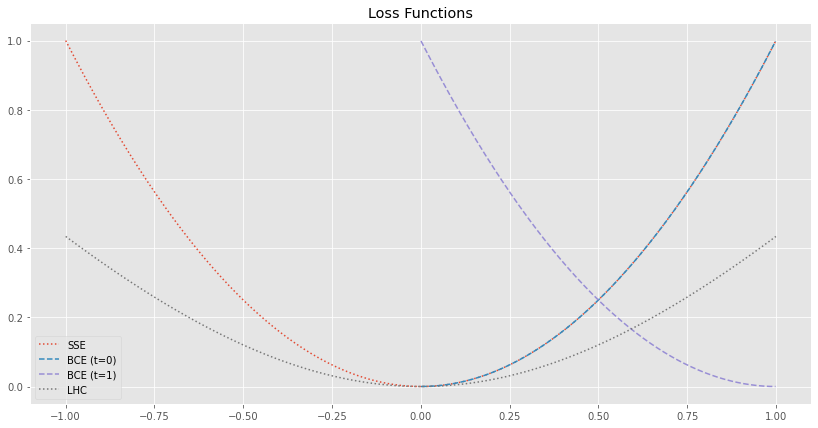

In [6]:
x = np.linspace(-1, 1, 2000)
sse_loss = SSE()
bce_loss = SSE()
lhc_loss = LHC()

plt.plot(x, sse_loss(0, x), ':', label='SSE')
plt.plot(x[(x > 0) & (x < 1)], bce_loss(0, x[(x > 0) & (x < 1)]), '--', label='BCE (t=0)')
plt.plot(x[(x > 0) & (x < 1)], bce_loss(1, x[(x > 0) & (x < 1)]), '--',  label='BCE (t=1)')
plt.plot(x, lhc_loss(0, x), ':', label='LHC')
plt.legend()
plt.title('Loss Functions');

### Activations

The next term is the rate of change in the activated outputs from the linear predictor. This is simply the derivative of the activation function. This is implemented element wise on each dimension of the input. Let's look at two examples. 

The first is the logistic sigmoid function. 

$$
\sigma(h) = \frac{1}{1+e^{-h}}.
$$

The derivative is

$$
\frac{\partial a}{\partial h} = \sigma'(h) = \sigma(h)(1 - \sigma(h)).
$$

Let's implement this.

In [7]:
class Sigmoid:
    
    def __call__(self, h):
        # Make your implementation here
        pass
    
    def grad(self, h):
        # Make your implementation here
        pass

Next we have ReLU, given by

$$
r(h) = \max(0,h)
$$

and the derivative is given by

$$
\frac{\partial a}{\partial h} = r'(h) = \max(0,h) / h
$$


In [8]:
class ReLU:
    
    def __call__(self, h):
        # Make your implementation here
        pass
    
    def grad(self, h):
        # Make your implementation here
        pass


There are several more loss functions we could discuss, but these are the most prominent ones. 

##### NOTE

Even though we use the notation $\sigma$ and $r$ here, we generalize by calling a general activation function for $\gamma$ later.

### Linear Predictor / Linear Layer

Then we have the rate of change of the linear predictor w.r.t. the inputs. This is split into the bias term - which is constant so the derivative is just 1 - and the weight term. The matrix is multiplied by the inputs sequentially, so this is just

$$
\frac{\partial h}{\partial W_i} = x
$$

so this is just the input stacked into a number of rows equal to the output dimension. This can be very concisely done with Einstein summation. Einstein summation is a shorthand for tensor multiplication which was first introduced by Albert Einstein his general theory of relativity. The whole idea is simply to omit the summation signs, so for example


$$
\begin{align}
C_{ij} &= \sum_m \sum_n A_{mi} B_{jn} \\
&= A_{mi} B_{jn}.
\end{align}
$$

This can be particularily useful when working with tensor operations, which we do a lot of in machine learning. We can use `np.einsum` to do the last calculations on the layer. We want

$$
\begin{align}
\frac{\partial L}{\partial W} &=  \frac{\partial L}{\partial a}\frac{\partial a}{\partial h}\frac{\partial h}{\partial W} \\
&= (L' \odot \gamma'(h)) x^T
\end{align}
$$

which is an outer product. When doing this over batches, this can get a little messy to apply vectorized, so we use Einstein summation, so that

$$
\left(\frac{\partial L}{\partial W}\right)_{nqp} = (L' \odot \gamma'(h))_{nq} x_{np}.
$$

We also use this trick to calculate the loss contribution backwards, (although we could strictly speaking use simple matrix multiplication here), yielding

$$
\left(\frac{\partial L}{\partial x}\right)_{np} = (L' \odot \gamma'(h))_{nq} W_{qp}.
$$


#### Tips: Check your dimensions!

Remember that we mentioned that the dimensions should be of a particular size to ensure that everything works as expected. There are however two ways to go about this. We can either generalize over the batches immediately, or generalize over the batches in the end. No matter what, we should make sure that our dimensions add up to what we expect. 

Let's do a small test where

* $n = 2$,
* $p = 4$,
* $q = 3$,

In [9]:
n = 2
p = 4
q = 3

x = np.random.randn(n, p)
W = np.random.randn(q, p)
b = np.random.rand(q)
g = ReLU()

h = x @ W.T
print(h.shape, '\t\t[should be (2, 3)]')

h += b
print(h.shape, '\t\t[should be (2, 3)]')

a = g(h)
print(a.shape, '\t\t[should be (2, 3)]')

(2, 3) 		[should be (2, 3)]
(2, 3) 		[should be (2, 3)]
(2, 3) 		[should be (2, 3)]


Good, our dimensions are so far okay. But now we want to compute the derivatives!

In [10]:
dadh = g.grad(h)
print(dadh.shape, '\t\t[should be (2, 3)]')

dadW = np.einsum('nq,np->nqp', dadh, x)
print(dadW.shape, '\t[should be (2, 3, 4)]')

dadx = np.einsum('nq,qp->np', dadh, W)
print(dadx.shape, '\t\t[should be (2, 4)]')

(2, 3) 		[should be (2, 3)]
(2, 3, 4) 	[should be (2, 3, 4)]
(2, 4) 		[should be (2, 4)]


### Full Layer Implementation

Okay, so this admittedly does gets a little hairy, but we should be able to implement this now. To make our lives easier, we save variables underway to make it clear what we are doing.

In [11]:
class NetworkLayer:
    
    activations = {
        'ReLU' : ReLU(),
        'Sigmoid': Sigmoid(),
    }
    
    def __init__(self, in_dim, out_dim, bias=True, activation='ReLU'):
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.W = 2 * np.random.randn(out_dim, in_dim) / np.sqrt(in_dim)
        self.b = np.random.randn(out_dim) if bias else None
        self.g = self.activations[activation]
        self.reset()
    
    def reset(self):
        self._x = None
        self._h = None
        self._a = None
        self._dLdh = None
        self._dLdW = None
        self._dLdx = None
        
    def __call__(self, x):
        # Make your implementation here
        # Do a forward pass through the layer
        self._x = x
        self._a = a
        self._h = h
        return a
    
    def grad(self, L):
        # Make your implementation here
        # Calculate gradients dLdh, dLdW, and dLdx and store them as attributes
        return self._dLdx
    
    def update(self, eta=0.01):
        # Make your implementation here
        # Update W with self._dLdW and b with self._dLdh times learning rate eta
        self.reset()
        
        

### Batch Learning with SGD

Stochastic gradient descent is a powerful optimization method which ideally prevents the optimization process from becoming stuck in a local minima by appling some randomness. This randomness can be pretty much anything, and in neural networks we use batch training. A batch is a small set of samples from the training set which are being drawn in random order to add stochasticity to the training process.

To apply SGD, we simply implement a batch iterator and use gradient descent which we generalize over each batch to update the weights.

In [12]:
class BatchIterator:
    
    def __init__(self, data, target, batch_size, shuffle=True):
        self.data = data
        self.target = target
        self.batch_size = batch_size
        self.n = len(data)
        self.iterations = self.n // self.batch_size
        self.indices = np.arange(self.n)
        self.shuffle = shuffle
        if self.n % batch_size != 0:
            self.iterations += 1
        
        
    def __iter__(self):
        # Make your implementation here
        pass
        

### Putting it all together

Let's test our implementation. We load the noisy 'AND' operator from the perceptron example.

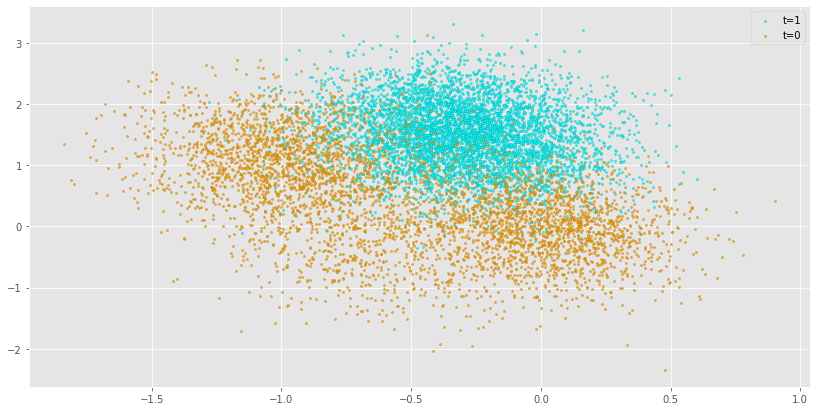

In [13]:
data = np.loadtxt('./data/data_and.csv', delimiter=';')
target = np.loadtxt('./data/target_and.csv', delimiter=';')[:, None]

plotkwargs = {
    's': 5,
    'edgecolors': 'black',
    'linewidth': 0.1,
}

color1 = 'cyan' # (1.0, 0.4, 0.7, 0.8)
color0 = 'orange' # (0.4, 0.7, 1.0, 0.8)
cmap = 'PiYG'
contouralpha = 0.9

plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

Now we initialize a batch iterator with a batch size of 50.

In [14]:
iterator = BatchIterator(data, target, 50)
losses = {'AND':{}, 'XOR':{}}

Like in the perceptron, we want to visualize the solution space, so we use the meshgrid solution again.

In [15]:
# Create meshgrid
_rangex = np.linspace(-2, 1, 500)
_rangey = np.linspace(-3, 4, 500)
xs, ys = np.meshgrid(_rangex, _rangey)

Let's learn! We split our training process up into epochs. One epoch is a full training cycle on the entire dataset. We run 64 epochs in this example. This might seem like a lot, but we are using with a quite small learning rate to ensure stability. Furthermore, we want to compare our models with both the 'AND' and 'XOR' data, and we want to ensure the models are trained sufficiently for both data sets.

### Model 1A: Logistic Regression on the AND dataset

A single layer neural network model with the sigmoid function and binary cross entropy loss is a Logistic Regression model. 

In [16]:
epochs = 64

L1 = NetworkLayer(2, 1, activation='Sigmoid')
loss = BCE()
losses['AND']['LR'] = []

for e in range(epochs):
    for d, t in iterator:
        th = L1(d)
        losses['AND']['LR'].append(np.mean(loss(t, th), axis=0))
        L = loss.grad(t, th)
        L1.grad(L)
        L1.update(eta=0.05)
    
    clear_output(wait=True)
    th = L1(data)
    l = np.mean(loss(target, th), axis=0)
    print(f'epoch: {e:3} loss: {l[0]:12.5E}')

epoch:  63 loss:  3.22080E-01


Nice, the loss is clearly dropping and stabilizing. Let's visualize the solution space!

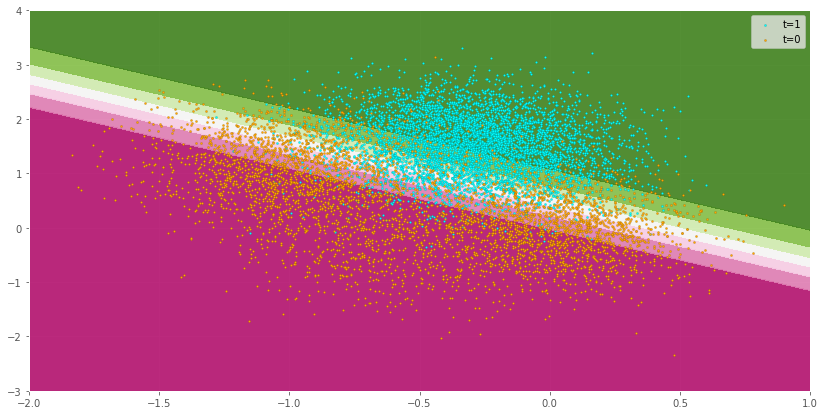

In [17]:
fs = np.zeros((500, 500))
for i, (x, y) in enumerate(zip(xs, ys)):
    xys = np.hstack([x[:,None], y[:,None]])
    fs[i] = L1(xys)[:,0]

plt.contourf(xs, ys, fs, cmap=cmap, alpha=contouralpha)
plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

Even though a non-linearity is introduced via the logistic sigmoid function, we end up with a linear decision boundary. The only added non linearity is the "height" or "depth" of the solution space, which now approximates an S-shape. This S-shape allows the solution space to bend according to 

### Model 1B: Neural Network on the AND dataset

In [18]:
L1 = NetworkLayer(2, 128, activation='Sigmoid')
L2 = NetworkLayer(128, 1, activation='Sigmoid')
loss = BCE()
losses['AND']['MLP'] = []

for e in range(epochs):
    for d, t in iterator:
        th = L2(L1(d))
        losses['AND']['MLP'].append(np.mean(loss(t, th), axis=0))
        L = loss.grad(t, th)
        L = L2.grad(L)
        L = L1.grad(L)
        L2.update(eta=0.05)
        L1.update(eta=0.05)

    clear_output(wait=True)
    th = L2(L1(data))
    l = np.mean(loss(target, th), axis=0)
    print(f'epoch: {e:3} loss: {l[0]:12.5E}')

epoch:  63 loss:  2.31192E-01


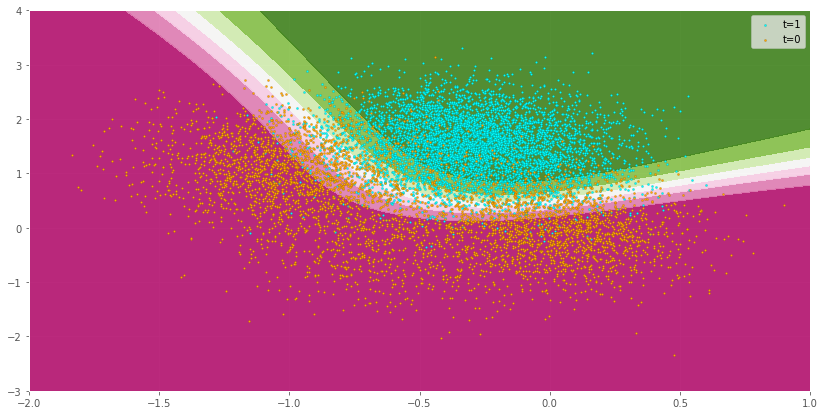

In [19]:
fs = np.zeros((500, 500))
for i, (x, y) in enumerate(zip(xs, ys)):
    xys = np.hstack([x[:,None], y[:,None]])
    fs[i] = L2(L1(xys))[:,0]

plt.contourf(xs, ys, fs, cmap=cmap, alpha=contouralpha)
plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

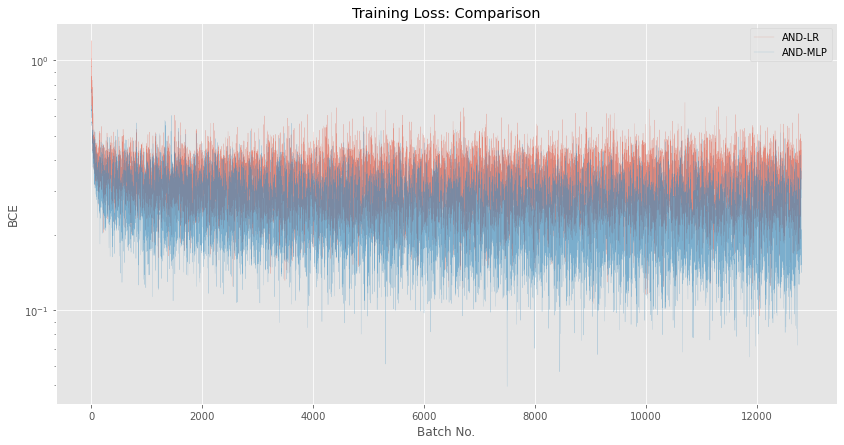

In [20]:
plt.plot(losses['AND']['LR'], linewidth=0.2, label="AND-LR", alpha=0.6);
plt.plot(losses['AND']['MLP'], linewidth=0.2, label="AND-MLP", alpha=0.6);
plt.legend()
plt.title("Training Loss: Comparison")
plt.yscale('log')
plt.xlabel('Batch No.')
plt.ylabel('BCE');

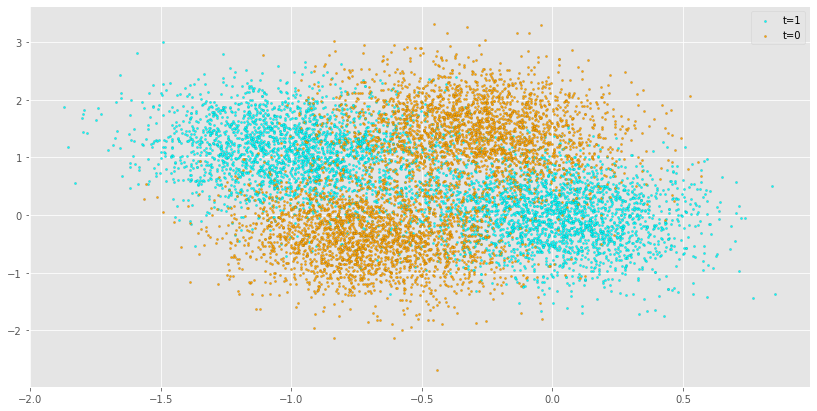

In [21]:
data = np.loadtxt('./data/data_xor.csv', delimiter=';')
target = np.loadtxt('./data/target_xor.csv', delimiter=';')[:, None]

plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

In [22]:
iterator = BatchIterator(data, target, 50)

### Model 2A: Logistic Regression on the XOR dataset

In [23]:
L1 = NetworkLayer(2, 1, activation='Sigmoid')
loss = BCE()
losses['XOR']['LR'] = []

for e in range(epochs):
    for d, t in iterator:
        th = L1(d)
        losses['XOR']['LR'].append(np.mean(loss(t, th), axis=0))
        L = loss.grad(t, th)
        L1.grad(L)
        L1.update(eta=0.05)
        
    clear_output(wait=True)
    th = L1(data)
    l = np.mean(loss(target, th), axis=0)
    print(f'epoch: {e:3} loss: {l[0]:12.5E}')

epoch:  63 loss:  6.93144E-01


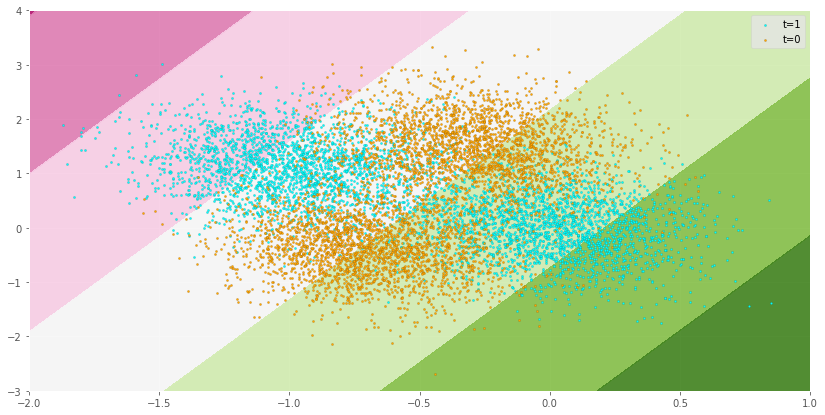

In [24]:
fs = np.zeros((500, 500))
for i, (x, y) in enumerate(zip(xs, ys)):
    xys = np.hstack([x[:,None], y[:,None]])
    fs[i] = L1(xys)[:,0]

plt.contourf(xs, ys, fs, cmap=cmap, alpha=contouralpha)
plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

### Model 2B: Neural Network on XOR dataset

In [25]:
L1 = NetworkLayer(2, 128, activation='Sigmoid')
L2 = NetworkLayer(128, 1, activation='Sigmoid')
loss = BCE()
losses['XOR']['MLP'] = []

for r in range(epochs):
    for d, t in iterator:
        th = L2(L1(d))
        losses['XOR']['MLP'].append(np.mean(loss(t, th), axis=0))
        L = loss.grad(t, th)
        L = L2.grad(L)
        L = L1.grad(L)
        L2.update(eta=0.05)
        L1.update(eta=0.05)
        
    clear_output(wait=True)
    th = L2(L1(data))
    l = np.mean(loss(target, th), axis=0)
    print(f'epoch: {e:3} loss: {l[0]:12.5E}')

epoch:  63 loss:  3.34197E-01


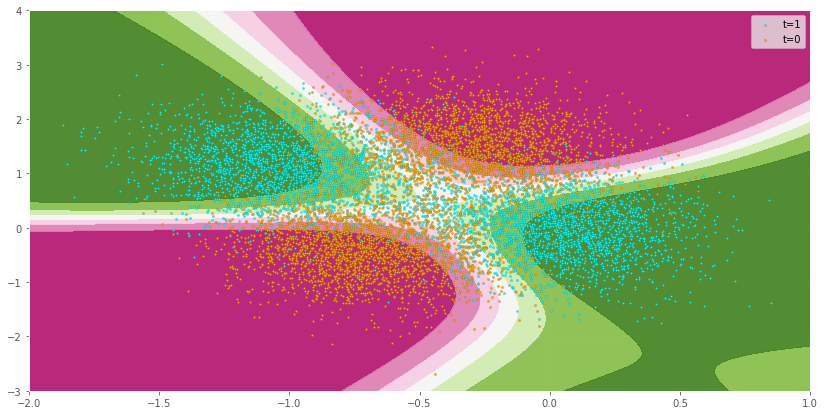

In [26]:
fs = np.zeros((500, 500))
for i, (x, y) in enumerate(zip(xs, ys)):
    xys = np.hstack([x[:,None], y[:,None]])
    fs[i] = L2(L1(xys))[:,0]

plt.contourf(xs, ys, fs, cmap=cmap, alpha=contouralpha)
plt.scatter(data[target[:,0] == 1, 0], data[target[:,0] == 1, 1], label='t=1', color=color1, **plotkwargs)
plt.scatter(data[target[:,0] != 1, 0], data[target[:,0] != 1, 1], label='t=0', color=color0, **plotkwargs)
plt.legend();

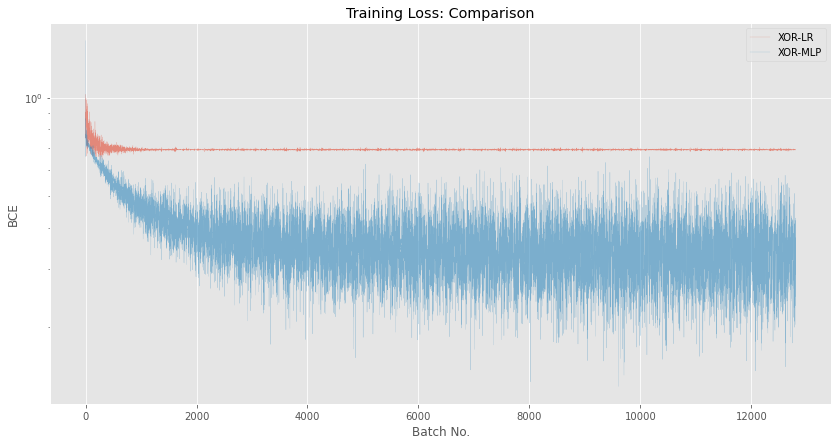

In [27]:
plt.plot(losses['XOR']['LR'], linewidth=0.2, label="XOR-LR", alpha=0.6);
plt.plot(losses['XOR']['MLP'], linewidth=0.2, label="XOR-MLP", alpha=0.6);
plt.legend()
plt.title("Training Loss: Comparison")
plt.yscale('log')
plt.xlabel('Batch No.')
plt.ylabel('BCE');